In [ ]:
#Dependencies
!pip install -U opencv-python==3.4.2.16
!pip install -U opencv-contrib-python==3.4.2.16 
!pip install -U imutils
!pip install -U cython
!pip install -U tensornets
!conda install -y -c conda-forge matplotlib
!conda install -y -c anaconda numpy
!conda install -y -c anaconda keras-gpu
!conda install -y tensorflow=1.14

In [1]:
# Utilized libraries
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import tensornets as nets

inputs = tf.placeholder(tf.float32, [None, 416, 416, 3]) 
model = nets.YOLOv3COCO(inputs, nets.Darknet19)

/home/devjrmax/anaconda3/envs/IA/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devjrmax/anaconda3/envs/IA/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devjrmax/anaconda3/envs/IA/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devjrmax/anaconda3/envs/IA/lib/python3.6/site-

# 1) Optical flow e tracking

Selecionar uma área de um video e realizar o tracking utilizando Optical Flow. Desenhe o vetor resultante entre as localizações das features.

Utilizar imagens da câmera do dispositivo (notebook ou celular) local, caso não tenha acesso, baixar um vídeo de exemplo e anexar no resultado.

# Sparse optical flow in video examples

In [8]:
video = cv2.VideoCapture('Videos/Examples/video3.mp4')

windowName = 'Sparse optical flow by Lucas Kanade with Shi-Tomasi corner detection. Press esc to exit'

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

widthExibithion = 720

heigthExibithion = 480

codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('Videos/Results/sparseOpticalExample.mp4', codec, 30.0, (widthExibithion,heigthExibithion))

length = length - 3

frameNumber = 0

_, prevFrame = video.read()
prevFrameGray = cv2.cvtColor(prevFrame, cv2.COLOR_BGR2GRAY)

positions = cv2.goodFeaturesToTrack(prevFrameGray, 100, 0.3, 7, None, None, 7)

mask = np.zeros_like(prevFrame)

while video.isOpened():
    _, frame = video.read()
    frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    nextPositions, status, err = cv2.calcOpticalFlowPyrLK(prevFrameGray, frameGray, positions, None, winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    goodNextPositions = nextPositions[status == 1]
    goodPrevPositions = positions[status == 1]

    for i,(new,old) in enumerate(zip(goodNextPositions, goodPrevPositions)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), (127, 255, 0), 2)

    image = cv2.add(frame, mask)
    
    image = cv2.resize(image, (widthExibithion, heigthExibithion)) 
    out.write(image)
    cv2.imshow(windowName, image)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27 or cv2.getWindowProperty(windowName, 0)<0 or frameNumber == length:
        break

    prevFrameGray = frameGray.copy()
    
    positions = goodNextPositions.reshape(-1, 1, 2)
    
    frameNumber = frameNumber + 1

cv2.destroyAllWindows()
out.release()
video.release()

# Sparse optical flow in webcam example

In [20]:
video = cv2.VideoCapture(0)

windowName = 'Sparse optical flow by Lucas Kanade with Shi-Tomasi corner detection. Press esc to exit'

widthExibithion = 720

heigthExibithion = 480

codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('Videos/Results/sparseOpticalWebcam.mp4', codec, 30.0, (widthExibithion,heigthExibithion))


_, prevFrame = video.read()
prevFrameGray = cv2.cvtColor(prevFrame, cv2.COLOR_BGR2GRAY)

positions = cv2.goodFeaturesToTrack(prevFrameGray, 100, 0.3, 7, None, None, 7)

mask = np.zeros_like(prevFrame)

while video.isOpened():
    _, frame = video.read()
    frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    nextPositions, status, err = cv2.calcOpticalFlowPyrLK(prevFrameGray, frameGray, positions, None, winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    goodNextPositions = nextPositions[status == 1]
    goodPrevPositions = positions[status == 1]

    for i,(new,old) in enumerate(zip(goodNextPositions, goodPrevPositions)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), (127, 255, 0), 2)

    image = cv2.add(frame, mask)
    
    image = cv2.resize(image, (widthExibithion, heigthExibithion)) 
    
    out.write(image)
    
    cv2.imshow(windowName, image)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27 or cv2.getWindowProperty(windowName, 0)<0:
        break

    prevFrameGray = frameGray.copy()
    
    positions = goodNextPositions.reshape(-1, 1, 2)
    
cv2.destroyAllWindows()
out.release()
video.release()

# Dense optical flow in video examples

In [11]:
video = cv2.VideoCapture("Videos/Examples/video2.mp4")

windowName = 'Dense optical flow by Gunner Farneback. Press esc to exit'

widthExibithion = 720

heigthExibithion = 480

codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('Videos/Results/denseOpticalExample.mp4', codec, 30.0, (widthExibithion,heigthExibithion))

_, frame = video.read()

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

length = length - 3

frameNumber = 0

prevFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

hsv = np.zeros_like(frame)

hsv[...,1] = 255

while video.isOpened():
    _, frameSeq = video.read()
    
    nextFrame = cv2.cvtColor(frameSeq, cv2.COLOR_BGR2GRAY)

    flowFarneback = cv2.calcOpticalFlowFarneback(prevFrame,nextFrame, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    magnitude, angle = cv2.cartToPolar(flowFarneback[...,0], flowFarneback[...,1])
    hsv[...,0] = (angle*180)/np.pi/2
    hsv[...,2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
    flowFarnebackImage = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    flowFarnebackImage = cv2.resize(flowFarnebackImage, (widthExibithion, heigthExibithion))
    
    out.write(flowFarnebackImage)
    
    cv2.imshow(windowName,flowFarnebackImage)
    
    key = cv2.waitKey(30) & 0xff
    if key == 27 or cv2.getWindowProperty(windowName, 0)<0 or frameNumber == length:
        break

    prevFrame = nextFrame
    
    frameNumber = frameNumber + 1
    
cv2.destroyAllWindows()
video.release()
out.release()

# Dense optical flow in webcam example

In [15]:
video = cv2.VideoCapture(0)

windowName = 'Dense optical flow by Gunner Farneback. Press esc to exit'

widthExibithion = 720

heigthExibithion = 480

codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('Videos/Results/denseOpticalWebcam.mp4', codec, 25.0, (widthExibithion,heigthExibithion))

_, frame = video.read()

frameNumber = 0

prevFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

hsv = np.zeros_like(frame)

hsv[...,1] = 255

while video.isOpened():
    _, frameSeq = video.read()
    
    nextFrame = cv2.cvtColor(frameSeq, cv2.COLOR_BGR2GRAY)

    flowFarneback = cv2.calcOpticalFlowFarneback(prevFrame,nextFrame, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    magnitude, angle = cv2.cartToPolar(flowFarneback[...,0], flowFarneback[...,1])
    hsv[...,0] = (angle*180)/np.pi/2
    hsv[...,2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
    flowFarnebackImage = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    flowFarnebackImage = cv2.resize(flowFarnebackImage, (widthExibithion, heigthExibithion))
    
    out.write(flowFarnebackImage)
    
    cv2.imshow(windowName,flowFarnebackImage)
    
    key = cv2.waitKey(30) & 0xff
    if key == 27 or cv2.getWindowProperty(windowName, 0)<0:
        break

    prevFrame = nextFrame
        
cv2.destroyAllWindows()
video.release()
out.release()

# 2) Image stitching

Utilizar descritores de imagem, como SURF, SIFT ou ORB para identificar descritores similares entre imagens e conecta-las, gerando uma unica imagem.

In [5]:
def cutStitchedImage(stitchedImage):
    gray = cv2.cvtColor(stitchedImage, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    c = max(cnts, key=cv2.contourArea)

    (x, y, w, h) = cv2.boundingRect(c)

    stitchedImage = stitchedImage[y:y + h, x:x + w]
    
    return stitchedImage

### Stitching Test 1

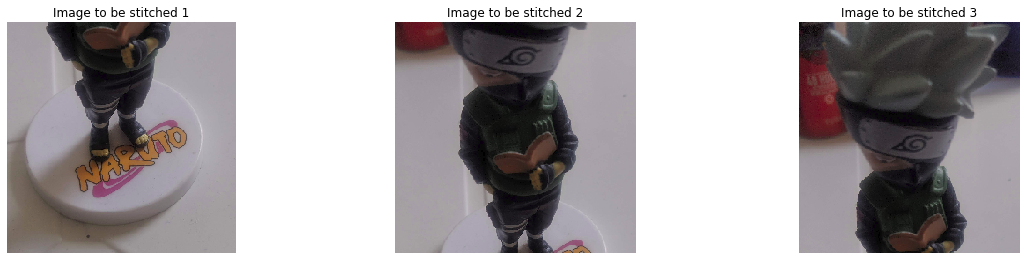

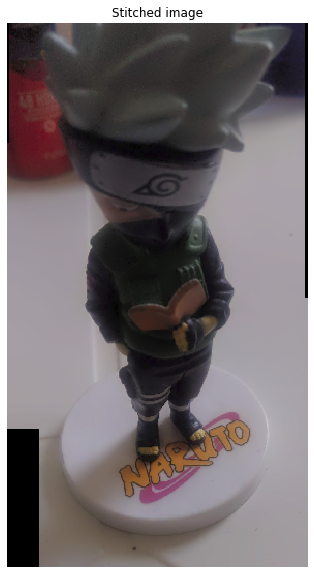

In [6]:
directory = "Images/Stitching test 1"
images = []

for filename in sorted(glob.glob(directory+'/*.*')):
        images.append(cv2.imread(filename))
        
stitcher = cv2.createStitcher() 

_, stitchedImage = stitcher.stitch(images)

stitchedImage = cutStitchedImage(stitchedImage)

plt.figure(figsize=(20,50))

axis = []

for i in range(len(images)):
    axis.append(plt.subplot(10,3,i+1))
    axis[i].axis('off')
    axis[i].set_title("Image to be stitched "+str(i+1))
    axis[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    
plt.show()

plt.figure(figsize=(20,10))
plt.title("Stitched image")
plt.imshow(cv2.cvtColor(stitchedImage, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### Stitching Test 2

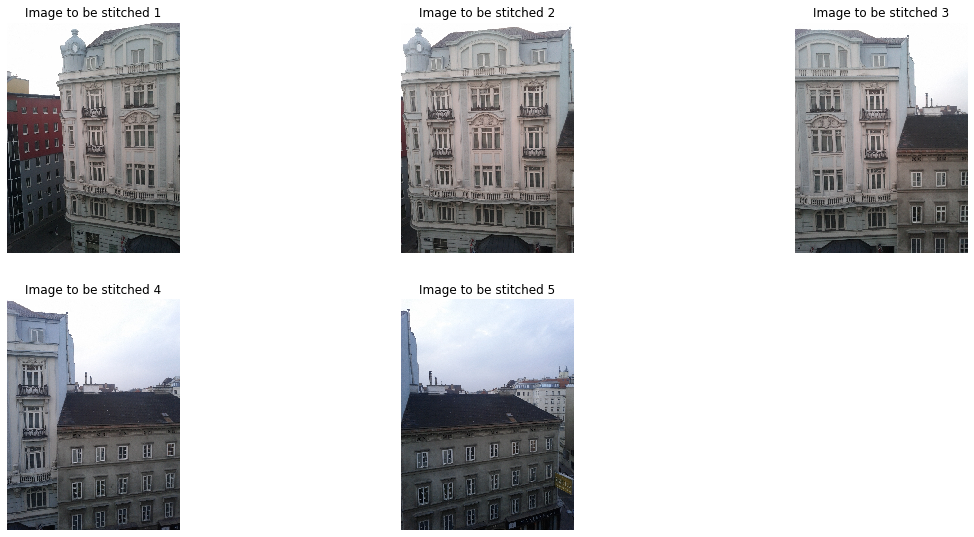

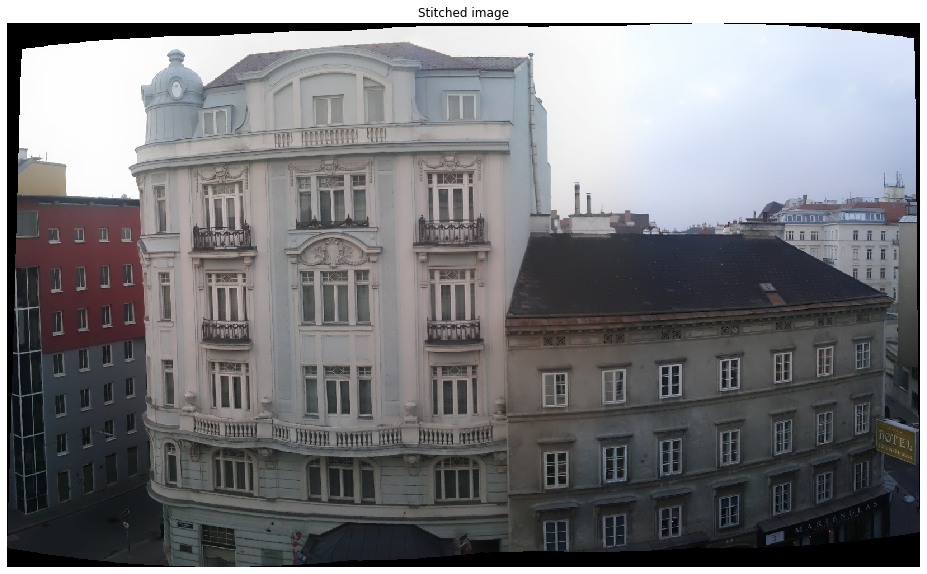

In [7]:
directory = "Images/Stitching test 2"
images = []

for filename in sorted(glob.glob(directory+'/*.*')):
        images.append(cv2.imread(filename)) 
        
stitcher = cv2.createStitcher() 

_, stitchedImage = stitcher.stitch(images)

stitchedImage = cutStitchedImage(stitchedImage)

plt.figure(figsize=(20,50))

axis = []

for i in range(len(images)):
    axis.append(plt.subplot(10,3,i+1))
    axis[i].axis('off')
    axis[i].set_title("Image to be stitched "+str(i+1))
    axis[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    
plt.show()

plt.figure(figsize=(20,10))
plt.title("Stitched image")
plt.imshow(cv2.cvtColor(stitchedImage, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

# 3) Object detection com deep learning

Detectar objetos em imagens ou vídeo utilizando um método de deep learning pre treinado com imagens do dataset ImageNet, MS COCO ou outros.

Justificar a escolha do modelo e apresentar seguintes resultados:

- Métrica de validação
- Métricas de treinamento
- Frames por segundos

In [3]:
def putCountour(image, preds, numClasses):
    boxes = model.get_boxes(preds, image.shape[1:3])
    boxes1=np.array(boxes)
    for j in numClasses:
        count =0
        if str(j) in classes:
            lab=classes[str(j)]
        if len(boxes1) !=0:
            for i in range(len(boxes1[j])):
                box=boxes1[j][i] 
                if boxes1[j][i][4]>=.40:
                    count = count + 1    
                    cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),1)
                    cv2.putText(img, lab, (box[0],box[1]), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 255), lineType=cv2.LINE_AA)
                    
    return img

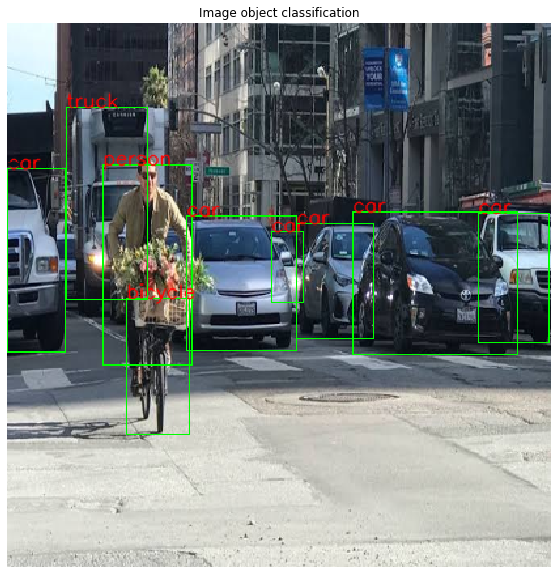

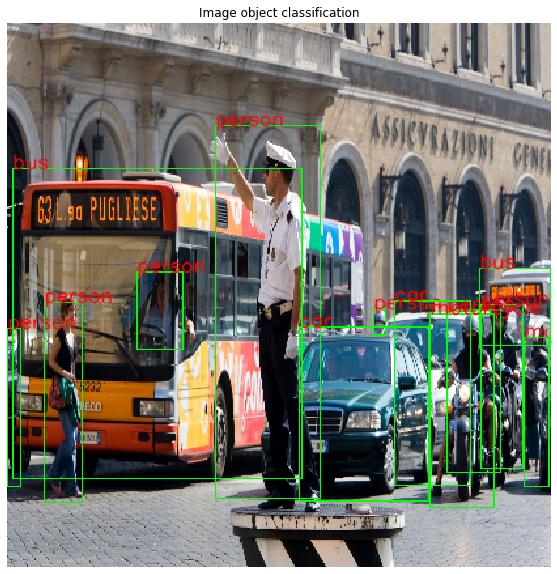

In [4]:
classes = {}
count = 0
numClasses = []
f = open("coco-labels-2014_2017.txt")
for line in f:
    classes[str(count)] = line.rstrip("\r\n")
    numClasses.append(count)
    count = count + 1

with tf.Session() as sess:
    sess.run(model.pretrained())    
    frame = cv2.imread("Images/Object detection/1.jpeg")
    img = cv2.resize(frame,(416, 416))
    imge = np.array(img).reshape(-1, 416, 416, 3)

    preds = sess.run(model.preds, {inputs: model.preprocess(imge)})
    
    img = putCountour(imge, preds, numClasses)

plt.figure(figsize=(20,10))
plt.title("Image object classification")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

with tf.Session() as sess:
    sess.run(model.pretrained())    
    frame = cv2.imread("Images/Object detection/2.png")
    img = cv2.resize(frame,(416, 416))
    imge = np.array(img).reshape(-1, 416, 416, 3)

    preds = sess.run(model.preds, {inputs: model.preprocess(imge)})
    
    img = putCountour(imge, preds, numClasses)

plt.figure(figsize=(20,10))
plt.title("Image object classification")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

In [6]:
video = cv2.VideoCapture("Videos/Examples/video4.mp4")

windowName = 'Real time video object classification. Press esc to exit.'


codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('Videos/Results/objectDetectionExample.mp4', codec, 30.0, (416, 416))

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

length = length - 3

frameNumber = 0

classes = {}
count = 0
numClasses = []

f = open("coco-labels-2014_2017.txt")
for line in f:
    classes[str(count)] = line.rstrip("\r\n")
    numClasses.append(count)
    count = count + 1


with tf.Session() as sess:
    sess.run(model.pretrained()) 
    while video.isOpened():
        _, frame = video.read()

        img= cv2.resize(frame,(416,416))
        
        imge = np.array(img).reshape(-1,416,416,3)

        preds = sess.run(model.preds, {inputs: model.preprocess(imge)})

        img = putCountour(imge, preds, numClasses)
    
        out.write(img)
    
        cv2.imshow(windowName,img)

        key = cv2.waitKey(30) & 0xff
        if key == 27 or cv2.getWindowProperty(windowName, 0)<0 or frameNumber == length:
            break

        frameNumber = frameNumber + 1
    
cv2.destroyAllWindows()
video.release()
out.release()